#**Importing Libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# **Loading the data**

In [60]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [61]:
##cleaning the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
data.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000



# **Feature finding which is important**

In [63]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [64]:
male=pd.get_dummies(data['sex'],drop_first=True) 
male


,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [65]:
#concat the gender male in data set
data=pd.concat([data,male],axis=1)
data.head()


,age,sex,bmi,children,smoker,region,expenses,male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


In [66]:
#now for smoker
Smoker=pd.get_dummies(data['smoker'],drop_first=True)
Smoker

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [67]:
#concateniation of smoker in data
data=pd.concat([data,Smoker],axis=1)

data.head()

,age,sex,bmi,children,smoker,region,expenses,male,yes
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0


In [68]:
data=data.rename(columns={'yes':'Smoker'}) 
data.head()

,age,sex,bmi,children,smoker,region,expenses,male,Smoker
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0
4,32,male,28.9,0,no,northwest,3866.86,1,0


In [69]:
#now for region 
data['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [71]:
Region=pd.get_dummies(data['region']) 
Region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [72]:
data=pd.concat([data,Region],axis=1)
data.head()

,age,sex,bmi,children,smoker,region,expenses,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,0,0,1,0,0


# **Exploratory Analysis.. I.e Which data is important**

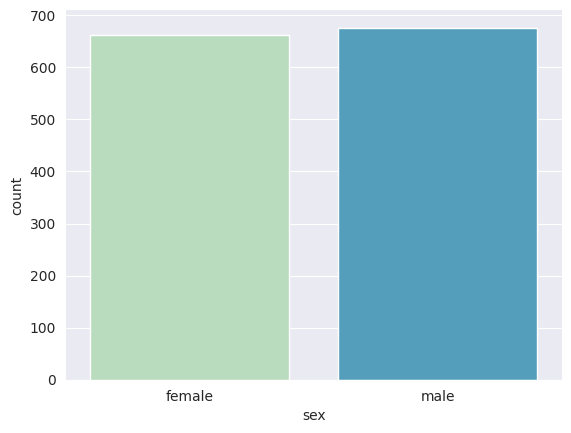

In [48]:
#we will check parameter distribution we have
##1.sex

sns.set_style('darkgrid')
sns.countplot(x='sex',data=data,palette="GnBu")

sns.despine(left=True)


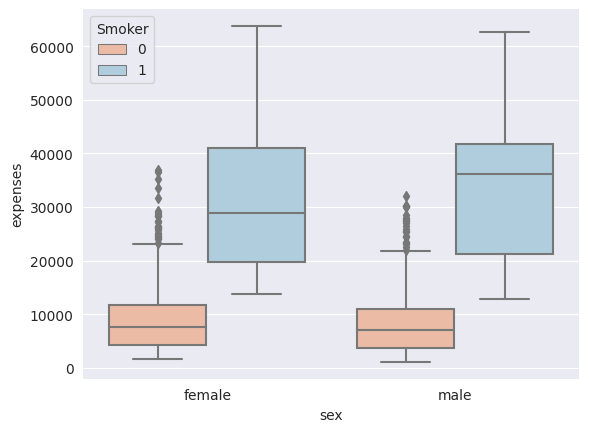

In [55]:
#Distribution To smoking and gender with respect to charges
sns.set_style('darkgrid')
sns.boxplot(x='sex', y='expenses',data=data,palette="RdBu",hue="Smoker")

sns.despine(left=True)


<Axes: xlabel='bmi', ylabel='expenses'>

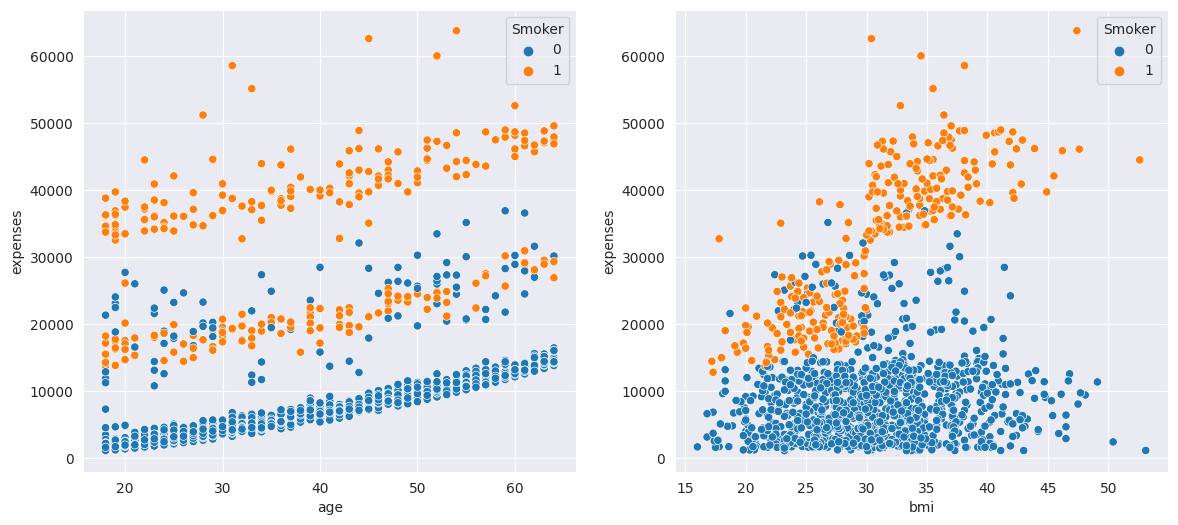

In [77]:
#relation with Smoker ,Age and expenses
# the yellow is showing the smoker and blue is showing non smoker
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x='age',y='expenses',data=data,hue="Smoker",ax=ax[0])
sns.scatterplot(x='bmi',y='expenses',data=data,hue="Smoker",ax=ax[1])## bmi with smoking and expenses

In [78]:
##we will drop the parameter not required
data.head()




,age,sex,bmi,children,smoker,region,expenses,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,0,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,0,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,0,0,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,0,0,1,0,0


In [80]:
data.drop(['sex','smoker','region'],axis=1,inplace=True)
data.head()

,age,bmi,children,expenses,male,Smoker,northeast,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,0,1
1,18,33.8,1,1725.55,1,0,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,0,1,0
3,33,22.7,0,21984.47,1,0,0,1,0,0
4,32,28.9,0,3866.86,1,0,0,1,0,0


<Axes: >

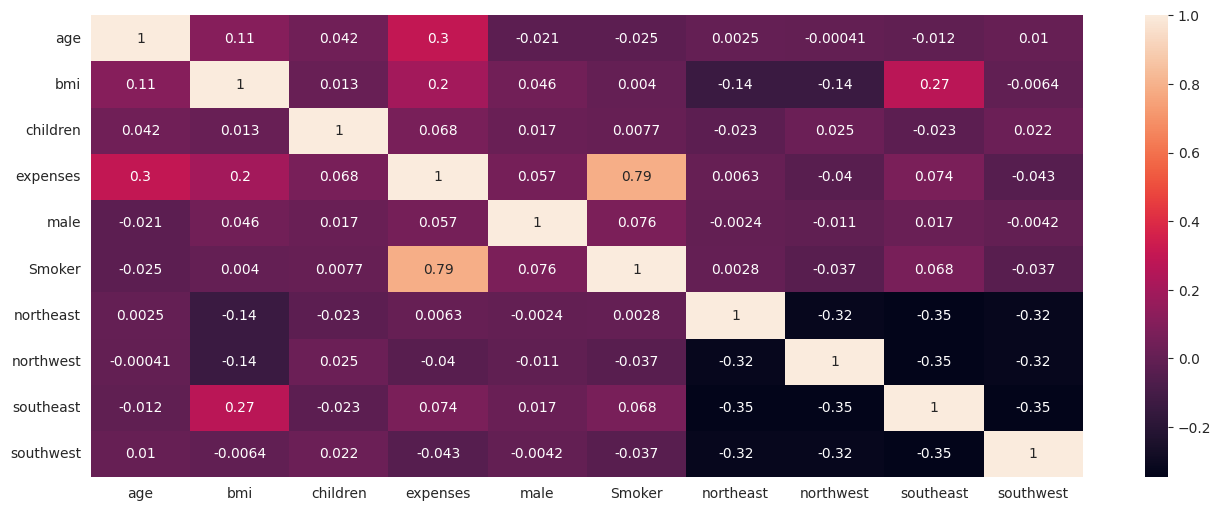

In [83]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)


**The Higher value the highly important data so lower correla. value data can be ignored**
**If we take expenses 
1.age is Important
2.bmi is important
3.smoker is important** 

In [92]:
x= data[['bmi', 'age','Smoker']] 
x


,bmi,age,Smoker
0,27.9,19,1
1,33.8,18,0
2,33.0,28,0
3,22.7,33,0
4,28.9,32,0
...,...,...,...
1333,31.0,50,0
1334,31.9,18,0
1335,36.9,18,0
1336,25.8,21,0


In [93]:
y=data['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

##spliting the data into test and **train**

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

x_train.shape

(936, 3)

**Scaling the dataset**

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [100]:
scaled_x_test

array([[-1.01263211, -0.5173878 ,  1.95569483],
       [-0.2101412 ,  0.99372284, -0.51132722],
       [-1.42206625,  1.20959579, -0.51132722],
       ...,
       [ 0.33031187,  0.92176519, -0.51132722],
       [-0.30840539, -0.5173878 , -0.51132722],
       [ 0.28117977, -0.01368425, -0.51132722]])

In [99]:
scaled_x_train

array([[-0.93074528,  1.71329933, -0.51132722],
       [ 0.21567031, -0.73326075, -0.51132722],
       [ 1.21468961,  1.78525698, -0.51132722],
       ...,
       [ 0.96902913,  0.84980754, -0.51132722],
       [ 0.23204767,  0.92176519, -0.51132722],
       [-0.71783953,  1.42546873, -0.51132722]])

##**Support Vector Regression Model**

In [101]:
from sklearn.svm import SVR
regressor= SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [103]:
##predicted

predicts = regressor.predict(scaled_x_test)


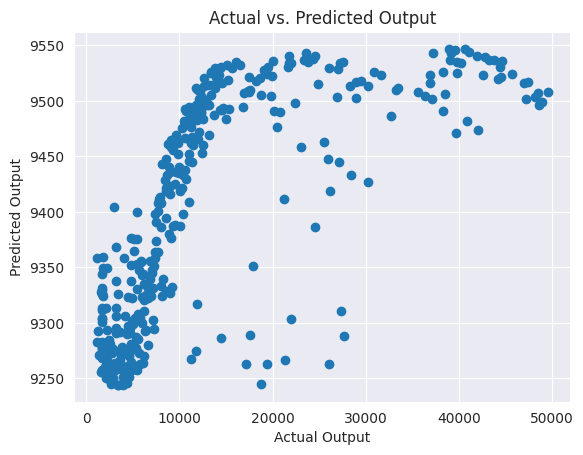

In [104]:
plt.scatter(y_test, predicts)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs. Predicted Output')
plt.show()

In [105]:
predicts[:10]

array([9521.95815787, 9464.72120512, 9466.60396972, 9258.96900983,
       9398.12274969, 9511.36023589, 9281.76586379, 9433.67601414,
       9470.9898205 , 9534.83447817])

In [106]:
y_test[:10]

909     17496.31
939      9487.64
1089    10577.09
63       4133.64
165     10407.09
534     13831.12
529      1708.00
959     28468.92
1156    39722.75
843     27533.91
Name: expenses, dtype: float64

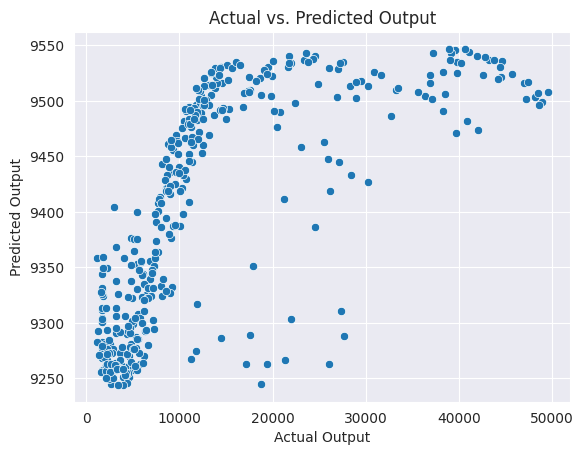

In [109]:
sns.scatterplot(x=y_test, y=predicts)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs. Predicted Output')
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error

# Assuming predicted_output and actual_output are numpy arrays or lists
rmse = mean_squared_error(y_test, predicts, squared=False)
print("RMSE:", rmse)

RMSE: 12429.878582238834
